# The data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).The prediction task is to determine whether a person makes over $50K a year. This is a classification problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv('income census.csv')

In [3]:
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df1=pd.DataFrame(data)

In [5]:
df1.shape

(32560, 15)

There are in total 32560 records and 15 features.

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The features named as Age, Fnlwgt, Education_num, Capital_gain,capital_loss, hours_per_week are numerical type and the rest of the features are having object datatype.
The Income is the target variable.

In [7]:
df1.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:>

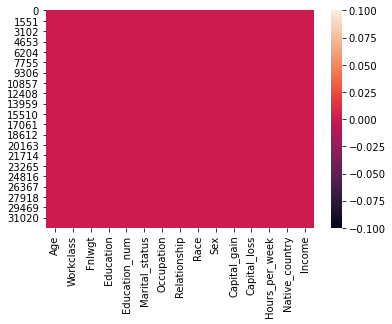

In [8]:
sns.heatmap(df1.isnull())

The maximum records pertaining to age lies in the range of 15 to 50 age.The maximum age is 90.

In [9]:
df1['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

The maximum records are from Private workclass. Further, there are 1836 records tagged against question mark so will be replacing the same by mode of the column which is "Private" in this case.

In [10]:
df1['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

The highest records i.e 10501 are from HS-grad and the minimum records are from Preschool.

In [11]:
df1['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

The maximum records i.e 10501 are from 9 and the minimum records are from 1.

In [12]:
df1['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

The maximum records i.e 14976 are from Married-civ-spouse and the minimum records i.e 23 are from Married-AF-spouse.

In [13]:
df1['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

The maximum records i.e 4140 are from  Prof-specialty and the lowest i.e 9 are from Armed-Forces.Further, there are 1843 records tagged against question mark so will be replacing the same by mode of the column which is "Prof-specialty" in this case.


In [14]:
df1['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

There are maximum records i.e 13193 having husband and lowest records i.e 981 are for other-relative.

In [15]:
df1['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

There are maximum records i.e 27815 for white race and the lowest i.e 271 are for other race. 

In [16]:
df1['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

There are maximum records i.e 21789 for male.

In [17]:
df1['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: Capital_gain, Length: 119, dtype: int64

There are maximum records i.e 29849 for 0 capital gain.

In [18]:
df1['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: Capital_loss, Length: 92, dtype: int64

There are maximum records i.e 31041 for 0 capital loss.

In [19]:
df1['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: Hours_per_week, Length: 94, dtype: int64

There are maximum records i.e 15216 for 40 hours_per_week.

In [20]:
df1['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

There are maximum records i.e 29169 for USA and lowest i.e 1 for Holand-Netherlands. Further,there are 583 records tagged against question mark so will be replacing the same by mode of the column which is " United-States " in this case.

In [21]:
df1['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

The maximum records i.e 24719 are for income <=50 K.

In [22]:
24719/32560

0.7591830466830467

In [23]:
7841/32560

0.24081695331695332

There are 75% of the records where the income lies in range of <=50 K and 25% of the records lies in the range of >50K.

There are question mark in feature named as 'Workclass','Occupation' and 'Native_country' which will be replaced by the mode of that column.

In [24]:
df1['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [25]:
df1['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [26]:
df1['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [27]:
df1['Workclass']=df1['Workclass'].replace(' ?',' Private')
df1['Occupation']=df1['Occupation'].replace(' ?',' Prof-specialty')
df1['Native_country']=df1['Native_country'].replace(' ?',' United-States')


In [28]:
df1['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [29]:
df1['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [30]:
df1['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

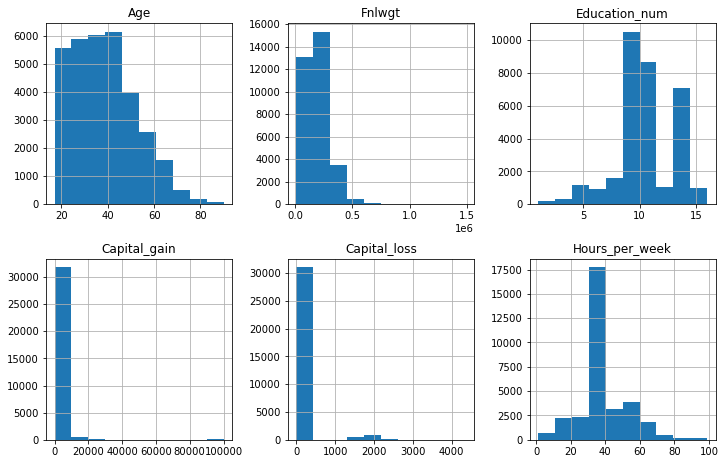

In [31]:
df1.hist(figsize=(12,12),layout=(3,3))

The age is spreaded in the range of 17 to 90 and the most of the age group lies in the bracket of 17 to 50 years.

The most of the records pertaining to Fnlwgt lies in the range of 0 to 0.3.

The most of the records pertaining to feature capital_gain lies in the range of 0 to 1500.

The most of the records pertaining to feature capital_loss lies in the range of 0 to 100.Further, there are few records in the range of 1200 to 2500 which are nothing but outliers.

The most of the records pertainin to hours_per_week lies in the range of 20 to 40.

<AxesSubplot:xlabel='count', ylabel='Workclass'>

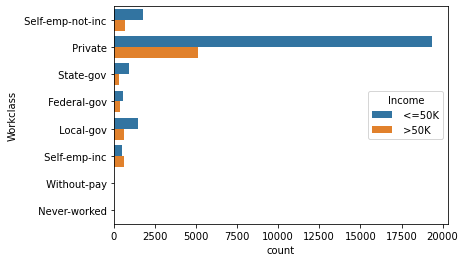

In [32]:
sns.countplot(y='Workclass',hue='Income',data=df1)

Most of the records i.e 24719 with the  Private workclass is having income less than <=50K.

In [33]:
df1[df1['Workclass']<='50K']['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

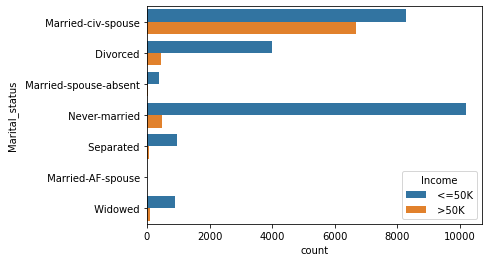

In [34]:
sns.countplot(y='Marital_status',hue='Income',data=df1)

The most of the recordsi.e 10191 pertaining to Never married class is having income less than <=50K.
The highest records with income >50K belongs to Married-civ-spouse category.

In [35]:
df1[df1['Marital_status']==' Never-married']['Income'].value_counts()

 <=50K    10191
 >50K       491
Name: Income, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Occupation'>

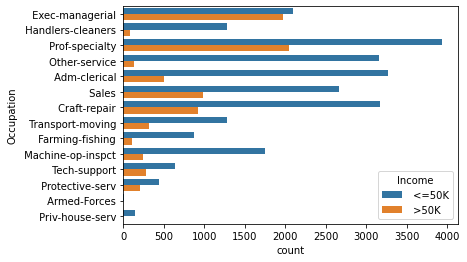

In [36]:
sns.countplot(y='Occupation',hue='Income',data=df1)

The prof-speciality is having 3933 records with income <=50K and 2050 records with income >50K. i.e in the ratio of 65%(income<=50 K) and 35% (income>50K).
The Exec-managerial is having 2098 records with income <=50K and 1968 records with income>50K.ie in the ratio of 52 %(income<=50K) and 48% (income >50K) so there are equal chances that a person employed in Exec-managerial position can have income <=50 K and income >50 K.


In [37]:
df1[df1['Occupation']==' Prof-specialty']['Income'].value_counts()

 <=50K    3933
 >50K     2050
Name: Income, dtype: int64

In [38]:
df1[df1['Occupation']==' Exec-managerial']["Income"].value_counts()

 <=50K    2098
 >50K     1968
Name: Income, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Relationship'>

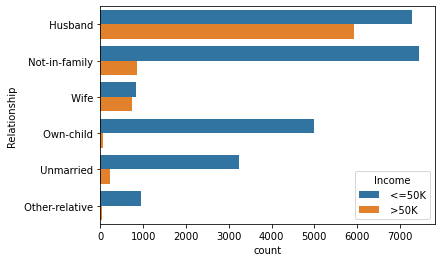

In [39]:
sns.countplot(y='Relationship',hue='Income',data=df1)

In [40]:
df1[df1['Relationship']==' Husband']['Income'].value_counts()

 <=50K    7275
 >50K     5918
Name: Income, dtype: int64

In [41]:
df1[df1['Relationship']==' Not-in-family']['Income'].value_counts()

 <=50K    7448
 >50K      856
Name: Income, dtype: int64

In [42]:
df1[df1['Relationship']==' Wife']['Income'].value_counts()

 <=50K    823
 >50K     745
Name: Income, dtype: int64

There are 7275 records related to husband having income<=50K and 5918 records having income >50 K. i.e in the ratio of 55%(income <=50 K) and 45% (income >50K).
There are 7448 records related to Not-in-family having income<=50K and 856 records having income>50K. i.e in the ratio of 90% (income<=50K) and 10% (income>50K).
There are 823 records related to wife having income <=50K and 745 records having income>50K. i.e in the ratio of 52% (income <=50K) and 48% (income>50 K).Further, there are approx equal chances of wife having income less than as well as greater than >50K.





<AxesSubplot:xlabel='count', ylabel='Race'>

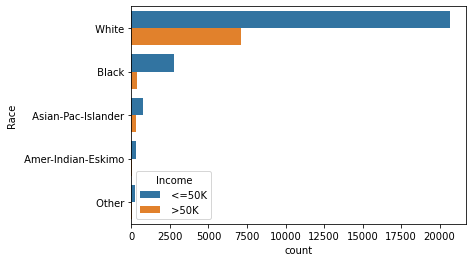

In [43]:
sns.countplot(y='Race',hue='Income',data=df1)

In [44]:
df1[df1['Race']==' White']['Income'].value_counts()

 <=50K    20698
 >50K      7117
Name: Income, dtype: int64

There are 20698 records having income <=50 K for white race and 7117 records having income >50 K. i.e in the ratio of 75% (income<=50 K) and 25% records (income>50 K).

<AxesSubplot:xlabel='Sex', ylabel='count'>

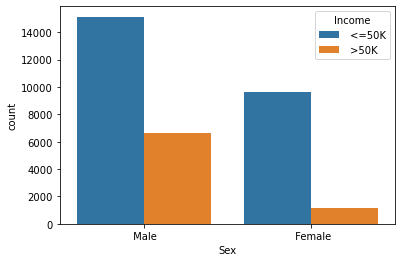

In [45]:
sns.countplot(x='Sex',hue='Income',data=df1)

In [46]:
df1[df1['Sex']==' Male']['Income'].value_counts()

 <=50K    15127
 >50K      6662
Name: Income, dtype: int64

There are 15127 records from male category having income <=50 K and 6662 records having income >50K. i.e in the ratio 69% (income<=50 K) and 31% (income >50 K).

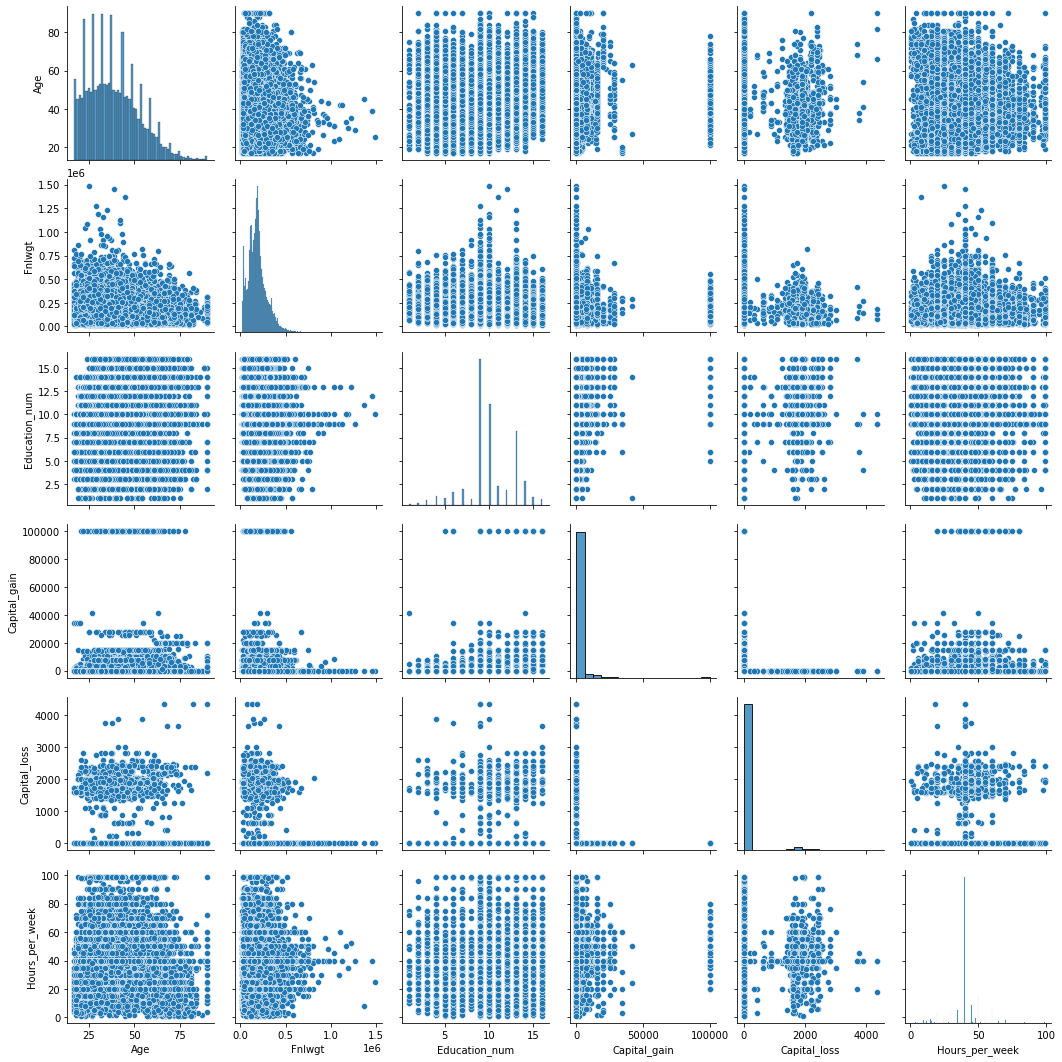

In [47]:
sns.pairplot(df1)

In [48]:
df1.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The age,Fnlwgt,Capital_gain,Capital_loss features are having right tailed skewed distribution  as mean is greater than median.
As there is a hugh difference between 75 %  and max value in all the features there are presence of outliers in all the features.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

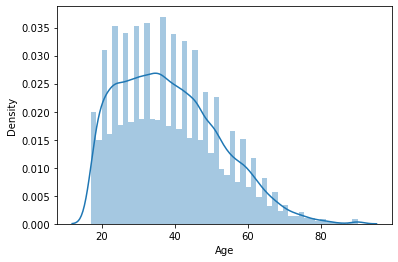

In [49]:
sns.distplot(df1['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

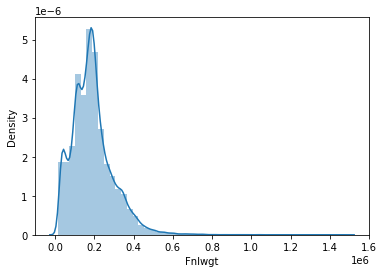

In [50]:
sns.distplot(df1['Fnlwgt'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education_num', ylabel='Density'>

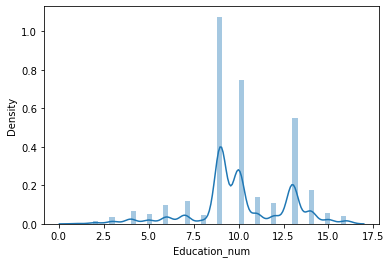

In [51]:
sns.distplot(df1['Education_num'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

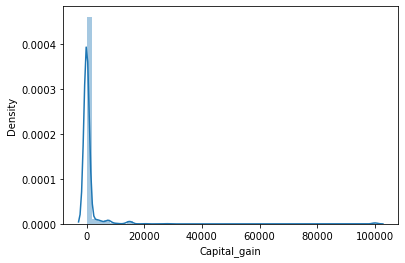

In [52]:
sns.distplot(df1['Capital_gain'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

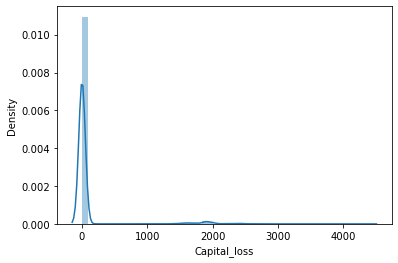

In [53]:
sns.distplot(df1['Capital_loss'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

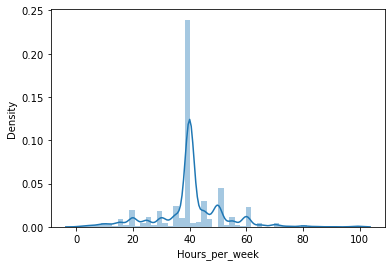

In [54]:
sns.distplot(df1['Hours_per_week'])

In [55]:
df2=df1.copy()

In [56]:
df2['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [57]:
df2['Education']=df2['Education'].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'school')
df2['Education']=df2['Education'].replace(' HS-grad','high school')
df2['Education']=df2['Education'].replace([' Assoc-voc',' Assoc-acdm',' Prof-school',' Some-college'],'higher')

In [58]:
df2['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [59]:
df2['Marital_status']=df2['Marital_status'].replace([' Married-civ-spouse',' Married-AF-spouse'],'married')
df2['Marital_status']=df2['Marital_status'].replace([' Divorced',' Married-spouse-absent',' Separated',' Widowed'],'others')

In [60]:
df2['Marital_status'].unique()

array(['married', 'others', ' Never-married'], dtype=object)

Have done feature engineering on few of the columns.

Checking out for outlier

Age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
Fnlwgt            AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Education_num     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Capital_gain         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Capital_loss      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Hours_per_week    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

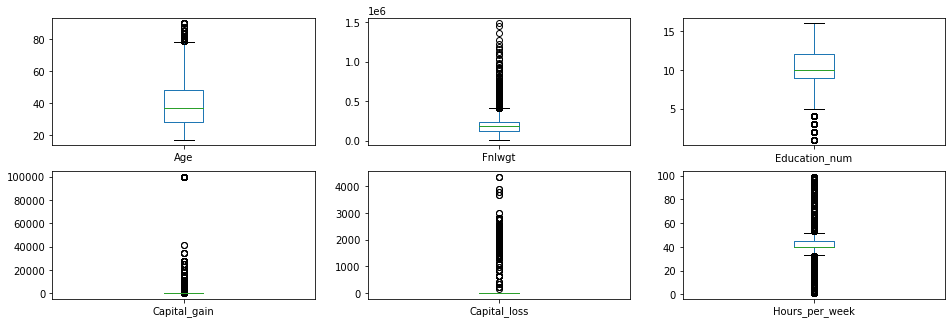

In [61]:
df2.plot(kind='box',figsize=[16,8],layout=[3,3],subplots=True)

In [62]:
pd.set_option('display.max_rows',None)
pd.crosstab(df1['Hours_per_week'],df1['Income'],margins=True)

Income,<=50K,>50K,All
Hours_per_week,,,
1,18,2,20
2,24,8,32
3,38,1,39
4,51,3,54
5,53,7,60
6,56,8,64
7,22,4,26
8,134,11,145
9,17,1,18


As most of the outliers pertaining to age lies closer to the whisker i will not remove them and keep it as it .

The hours_per_week can be more than Q3+ (1.5*IQR) and can less Q1-(1.5*IQR) than depending on which profession and position a person is there. I am not removing any outliers from it.

I am not removing any outliers from Education_num as they are closer to whiskers.


In [63]:
df2['Fnlwgt'].mean()

189781.81437346438

In [64]:
df3=df2.copy()

Treating Outliers in feature Fnlwgt using IQR method.

In [65]:
Q1=df3['Fnlwgt'].quantile(0.25)
Q3=df3['Fnlwgt'].quantile(0.75)
IQR=Q3-Q1
lower_boundary=Q1-(1.5*IQR)
upper_boundary=Q3+(1.5*IQR)
df3['Fnlwgt']=df3['Fnlwgt'].astype('float')
df3['Fnlwgt'].values[df3['Fnlwgt']>upper_boundary]=np.nan


In [66]:
df3['Fnlwgt'].isnull().sum()

992

In [67]:
df3['Fnlwgt']=df3['Fnlwgt'].fillna(df3['Fnlwgt'].median())

I have replaced the nan values with the median of that feature.

In [68]:
df3['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        47
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
3464        23
9386        22
2597        20
4101        20
2407        19
4865        17
2202        16
1506        15
3942        14
3674        14
4508        12
4416        12
3781        12
2580        12
10605       12
2907        11
25236       11
5455        11
6497        11
2354        11
2635        11
2463        11
2964         9
2105         9
6418         9
7430         9
2414         8
914          8
2977         8
1151         8
3471         8
4934         7
1471         7
1831         7
1797         7
3818         7
1409      

In [69]:
df3['Capital_gain'].mean()

1077.615171990172

In [70]:
Q11=df3['Capital_gain'].quantile(0.25)
Q31=df3['Capital_gain'].quantile(0.75)
IQR1=Q31-Q11
lower_boundary=Q11-(1.5*IQR1)
upper_boundary=Q31+(1.5*IQR1)


In [71]:
df3['Capital_gain'].quantile(0.75)

0.0

As i am getting 0.25 quantile and 0.75 quantile as 0 and resulting in IQR as 0 so all those values above zero will be replaced by whatever is selected mean or median of the feature but that is not correct to replace all the values by mean of the feature as the median is zero. So i am not treating it and keeping outliers as it is.

In [72]:
Q12=df3['Capital_loss'].quantile(0.25)
Q32=df3['Capital_loss'].quantile(0.75)
IQR2=Q32-Q12
lower_boundary=Q12-(1.5*IQR2)
upper_boundary=Q32+(1.5*IQR2)


In [73]:
IQR2

0.0

As i am getting 0.25 quantile and 0.75 quantile as 0 and resulting in IQR as 0 so all those values above zero will be replaced by whatever is selected mean or median of the feature but that is not correct to replace all the values by mean of the feature as the median is zero. So i am not treating it and keeping outliers as it is.

# Skewness check

In [74]:
df3.skew()

Age                0.558738
Fnlwgt             0.421706
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [75]:
from  sklearn.preprocessing import power_transform

In [76]:
df4=df3.copy()

In [77]:
df3['Capital_gain']=power_transform(df3['Capital_gain'].values.reshape(-1,1))

In [78]:
df3['Capital_loss']=power_transform(df3['Capital_loss'].values.reshape(-1,1))

In [79]:
df3.skew()

Age               0.558738
Fnlwgt            0.421706
Education_num    -0.311630
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
dtype: float64

Have treated Skewness still it is higher in few of the features named as Capital_gain and Capital_loss but I am keeping it as it and not treating it as i have tried other methods like sqrt,cbrt but i am getting the same values as above.

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le=LabelEncoder()
df3['Workclass']=le.fit_transform(df3['Workclass'])
df3['Education']=le.fit_transform(df3['Education'])
df3['Marital_status']=le.fit_transform(df3['Marital_status'])
df3['Occupation']=le.fit_transform(df3['Occupation'])
df3['Relationship']=le.fit_transform(df3['Relationship'])
df3['Race']=le.fit_transform(df3['Race'])
df3['Sex']=le.fit_transform(df3['Sex'])
df3['Native_country']=le.fit_transform(df3['Native_country'])
df3['Income']=le.fit_transform(df3['Income'])
                                           

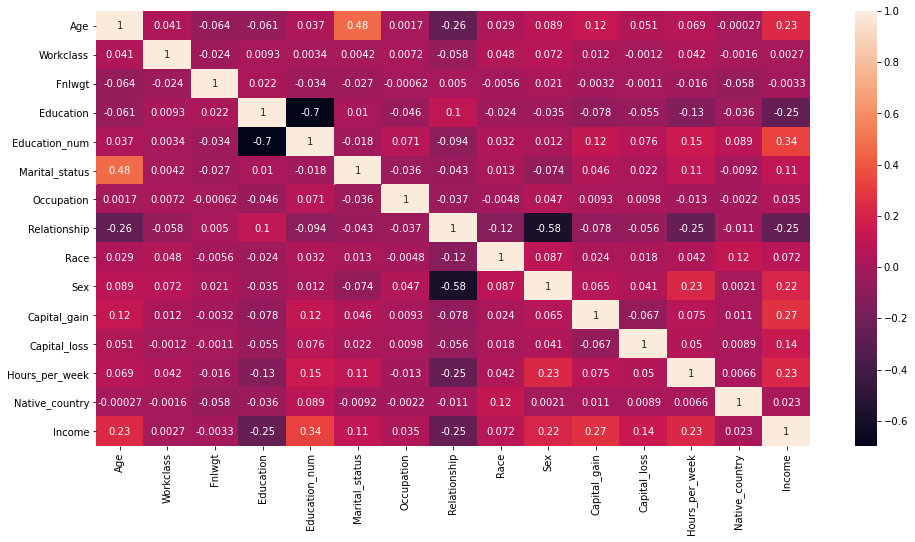

In [106]:
plt.figure(figsize=[16,8])
sns.heatmap(df3.corr(),annot=True)
plt.show()


There is a positive correlation of the income with the age.

There is a positive correlation of the income with Education_num.
There is a positive correlation of the income with capital_gain,capital_loss and hours_per_week.


In [83]:
df3['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [84]:
x=df3.drop('Income',axis=1)
y=df3['Income']

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
se=StandardScaler()
x=se.fit_transform(x)

# Applying train_test_split

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.8132678132678133
[[4578  334]
 [ 882  718]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4912
           1       0.68      0.45      0.54      1600

    accuracy                           0.81      6512
   macro avg       0.76      0.69      0.71      6512
weighted avg       0.80      0.81      0.80      6512



In [89]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))


0.8019041769041769
[[4261  651]
 [ 639  961]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4912
           1       0.60      0.60      0.60      1600

    accuracy                           0.80      6512
   macro avg       0.73      0.73      0.73      6512
weighted avg       0.80      0.80      0.80      6512



In [90]:
svc=SVC()
svc.fit(x_train,y_train)
pred2=svc.predict(x_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))



0.8341523341523341
[[4580  332]
 [ 748  852]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4912
           1       0.72      0.53      0.61      1600

    accuracy                           0.83      6512
   macro avg       0.79      0.73      0.75      6512
weighted avg       0.83      0.83      0.83      6512



In [91]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))


0.8191031941031941
[[4384  528]
 [ 650  950]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4912
           1       0.64      0.59      0.62      1600

    accuracy                           0.82      6512
   macro avg       0.76      0.74      0.75      6512
weighted avg       0.81      0.82      0.82      6512



In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred4=rfc.predict(x_test)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))


0.8485872235872236
[[4526  386]
 [ 600 1000]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4912
           1       0.72      0.62      0.67      1600

    accuracy                           0.85      6512
   macro avg       0.80      0.77      0.79      6512
weighted avg       0.84      0.85      0.84      6512



In [94]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred5=ada.predict(x_test)
print(accuracy_score(y_test,pred5))
print(confusion_matrix(y_test,pred5))
print(classification_report(y_test,pred5))


0.8578009828009828
[[4604  308]
 [ 618  982]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4912
           1       0.76      0.61      0.68      1600

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.79      6512
weighted avg       0.85      0.86      0.85      6512



In [95]:
gr=GradientBoostingClassifier()
gr.fit(x_train,y_train)
pred6=gr.predict(x_test)
print(accuracy_score(y_test,pred6))
print(confusion_matrix(y_test,pred6))
print(classification_report(y_test,pred6))

0.8625614250614251
[[4623  289]
 [ 606  994]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4912
           1       0.77      0.62      0.69      1600

    accuracy                           0.86      6512
   macro avg       0.83      0.78      0.80      6512
weighted avg       0.86      0.86      0.86      6512



# Checking out cross_val_score of all the models

In [96]:
from sklearn.model_selection import cross_val_score

In [97]:
score=cross_val_score(lr,x,y,cv=5)
print(score.mean())

0.8161547911547912


In [98]:
score1=cross_val_score(dtc,x,y,cv=5)
print(score1.mean())

0.8043611793611796


In [99]:
score2=cross_val_score(svc,x,y,cv=5)
print(score2.mean())

0.8370393120393121


In [100]:
score3=cross_val_score(knn,x,y,cv=5)
print(score3.mean())

0.8233108108108109


In [101]:
score4=cross_val_score(rfc,x,y,cv=5)
print(score4.mean())

0.8517506142506143


In [102]:
score5=cross_val_score(ada,x,y,cv=5)
print(score5.mean())

0.8561732186732188


In [103]:
score6=cross_val_score(gr,x,y,cv=5)
print(score.mean())

0.8161547911547912


The accuracy score and cross_val_score for all the models except gradient boosting classifier is same will go for hypertuning to find the best parameters.

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [108]:
params={'C':[0.1,0.2,0.3,0.4,0.5],'random_state':np.arange(1,100)}

In [109]:
re=RandomizedSearchCV(lr,param_distributions=params,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'random_state': 27, 'C': 0.2}

In [111]:
lr=LogisticRegression(C=0.2,random_state=27)
lr.fit(x_train,y_train)
pred7=lr.predict(x_test)
print(accuracy_score(y_test,pred7))
print(classification_report(y_test,pred7))
print(confusion_matrix(y_test,pred7))

0.8135749385749386
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4912
           1       0.68      0.45      0.54      1600

    accuracy                           0.81      6512
   macro avg       0.76      0.69      0.71      6512
weighted avg       0.80      0.81      0.80      6512

[[4580  332]
 [ 882  718]]


In [112]:
params1={'criterion':['gini','entropy'],'max_depth':[2,4,6,8,10],'max_features':['auto','sqrt','log2']}

In [113]:
re=RandomizedSearchCV(dtc,param_distributions=params1,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}

In [114]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='sqrt')
dtc.fit(x_train,y_train)
pred8=dtc.predict(x_test)
print(accuracy_score(y_test,pred8))
print(classification_report(y_test,pred8))
print(confusion_matrix(y_test,pred8))

0.8407555282555282
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      4912
           1       0.70      0.62      0.66      1600

    accuracy                           0.84      6512
   macro avg       0.79      0.77      0.78      6512
weighted avg       0.84      0.84      0.84      6512

[[4484  428]
 [ 609  991]]


In [116]:
params2={'n_neighbors':np.arange(1,5),'algorithm':['auto','ball_tree',]}

In [117]:
re=RandomizedSearchCV(knn,param_distributions=params2,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 4, 'algorithm': 'auto'}

In [123]:
knn=KNeighborsClassifier(n_neighbors=4,algorithm='auto')
knn.fit(x_train,y_train)
pred9=knn.predict(x_test)
print(accuracy_score(y_test,pred9))
print(classification_report(y_test,pred9))
print(confusion_matrix(y_test,pred9))

0.8141891891891891
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4912
           1       0.67      0.47      0.55      1600

    accuracy                           0.81      6512
   macro avg       0.76      0.70      0.72      6512
weighted avg       0.80      0.81      0.80      6512

[[4549  363]
 [ 847  753]]


In [120]:
params3={'kernel':['rbf','poly','linear']}

In [121]:
re=RandomizedSearchCV(svc,param_distributions=params3,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'kernel': 'rbf'}

In [122]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
pred10=svc.predict(x_test)
print(accuracy_score(y_test,pred10))
print(classification_report(y_test,pred10))
print(confusion_matrix(y_test,pred10))

0.8341523341523341
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4912
           1       0.72      0.53      0.61      1600

    accuracy                           0.83      6512
   macro avg       0.79      0.73      0.75      6512
weighted avg       0.83      0.83      0.83      6512

[[4580  332]
 [ 748  852]]


In [124]:
param4={'n_estimators':[50,100,150,200],'criterion':['gini','entropy'],'max_depth':np.arange(1,10),'max_features':['auto','sqrt','log2']}

In [125]:
re=RandomizedSearchCV(rfc,param_distributions=param4,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'n_estimators': 50,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'gini'}

In [126]:
rfc=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=9,max_features='sqrt')
rfc.fit(x_train,y_train)
pred11=rfc.predict(x_test)
print(accuracy_score(y_test,pred11))
print(classification_report(y_test,pred11))
print(confusion_matrix(y_test,pred11))

0.851044226044226
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4912
           1       0.78      0.55      0.65      1600

    accuracy                           0.85      6512
   macro avg       0.82      0.75      0.78      6512
weighted avg       0.84      0.85      0.84      6512

[[4659  253]
 [ 717  883]]


In [139]:
param5={'random_state':np.arange(1,50)}

In [142]:
re=RandomizedSearchCV(ada,param_distributions=param5,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'random_state': 23}

In [143]:
ada=AdaBoostClassifier(random_state=23)
ada.fit(x_train,y_train)
pred12=ada.predict(x_test)
print(accuracy_score(y_test,pred12))
print(confusion_matrix(y_test,pred12))
print(classification_report(y_test,pred12))

0.8578009828009828
[[4604  308]
 [ 618  982]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4912
           1       0.76      0.61      0.68      1600

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.79      6512
weighted avg       0.85      0.86      0.85      6512



# As i am getting highest accuracy in AdaBoostClassifier so AdaBoostClassifier is my best model.

In [144]:
from sklearn.metrics import plot_roc_curve

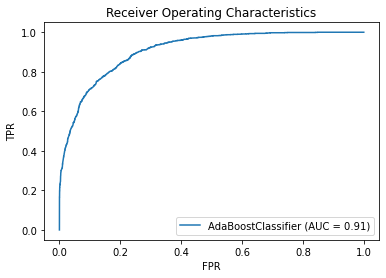

In [145]:
plot_roc_curve(ada,x_test,y_test)
plt.title('Receiver Operating Characteristics')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# I am getting AUC of 0.91 using AdaBoostClassifier.

In [146]:
import joblib

In [147]:
joblib.dump(ada,'income_predict.obj')

['income_predict.obj']

In [148]:
joblib.load('income_predict.obj')

AdaBoostClassifier(random_state=23)